<a href="https://colab.research.google.com/github/WANGCIPEI/libpku/blob/master/%E2%80%9C%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

64245


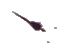

In [30]:
#coding=utf-8

import cv2 as cv
from google.colab.patches import cv2_imshow

bg_color = [255,255,255]

def calc_diff(pixel):
    return (pixel[0]-bg_color[0])**2 + (pixel[1]-bg_color[1])**2 + (pixel[2]-bg_color[2])**2

def remove_bg():
    image_path = '/content/10.png'
    pic = cv.imread(image_path)
    pic = cv.cvtColor(pic,cv.COLOR_BGR2BGRA)
    h, w = pic.shape[0:2]
    for i in range(h):
        for j in range(w):
            if calc_diff(pic[i][j]) < 20000:
                pic[i][j][0] = 255
                pic[i][j][1] = 255
                pic[i][j][2] = 255
    return pic

if __name__ == '__main__':
    pic = remove_bg()
    print(calc_diff([206,125,43]))
    remove_bg()
    cv2_imshow(pic)
    cv.imwrite('10.1.png',pic,[int(cv.IMWRITE_PNG_COMPRESSION)]) 